### 하이퍼파라미터
* 예측력을 높이기 위해 사용
* 과대/과소 적합을 방지하기 위해 사용
* 사용자가 지정하는 파라미터

#### 하이퍼파라미터 튜닝
* 특정 알고리즘의 매개변수 값을 변경하면서 최적의 파라미터를 찾는 방식
* GridSearchCV클래스를 통해 하이퍼파라미터 탐색과 교차 검증을 한번에 수행

#### GridSearchCV
* 교차 검증으로 하이퍼파라미터 탐색을 수행한다
* 최상의 모델을 찾은 후 훈련 세트 전체를 사용해 최종 모델을 훈련한다
* 매개변수
    - GridSearchCV(모델, param_grid = 파라미터, cv=반복횟수, n_jobs=코어 수(-1, 모든 코어 사용))

In [2]:
# 교차 검증이란?
#  : 70 퍼센트의 학습용 데이터를 다시 쪼개서 학습하고 쪼개서 학습한 단위를
#  : 단위 학습이 끝날 때마다 테스트를 진행

### K-최근접 이웃 알고리즘
* 주위에서 가장 가까운 다른 데이터를 보고 현재 데이터를 판단

#### 하이퍼파라미터
* n_neighbors
    - 기본 가까운 5개의 데이터를 보고 자기 자신이 어디에 속하는지를 판단
    - 비교하고자 하는 데이터의 수가 적을 수록 과대 적합이 된다
* metric : 거리계산 척도
    - euclidean(녹색) : 유클리디안 거리 측정
        * 목표 지점까지 가장 짧은 거리
    - manhattan(빨간색) : 맨하튼 거리 측정 방법
        * 찾아가는 경로의 모든 길이의 합
* weights : 가중치
    - uniform : 거리에 가중치 부여하지 않음(균일한 가중치)
    - distance : 거리에 가중치 부여(가까이 있는 데이터에 가중치)

<img src="../images/5.png" width="900" height="500" />

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv("../data_set/5.스케일링/titanic_cleaning.csv")
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500

In [6]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [19]:
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = "Survived"
X, y = df[features], df[label]

In [20]:
minMaxScaler = MinMaxScaler()
minMaxScaler.fit(X)
X_scaler = minMaxScaler.transform(X)

In [21]:
# 학습용 80%, 테스트용 20%
X_train_minMax, X_test_minMax, y_train, y_test = train_test_split(X_scaler, y, test_size=0.2)

In [22]:
# 알고리즘 생성
knn = KNeighborsClassifier()

knn.fit(X_train_minMax, y_train)

print("train ", knn.score(X_train_minMax, y_train))
print("test ", knn.score(X_test_minMax, y_test))

train  0.8721910112359551
test  0.8212290502793296


In [25]:
k_param = range(1, 11)
train_list = []
test_list = []
for k in k_param:
    knn = KNeighborsClassifier( n_neighbors=k )
    knn.fit(X_train_minMax, y_train)
    # print("k : ", k, "train : ", knn.score(X_train_minMax, y_train), knn.score(X_test_minMax, y_test))
    train_list.append(knn.score(X_train_minMax, y_train))
    test_list.append(knn.score(X_test_minMax, y_test))

dic = {
    "k" : k_param,
    "train 정확도" : train_list,
    "test 정확도" : test_list
}

score_df = pd.DataFrame(dic)
score_df

k  train 정확도  test 정확도
0   1   0.985955  0.754190
1   2   0.896067  0.793296
2   3   0.887640  0.810056
3   4   0.863764  0.826816
4   5   0.872191  0.821229
5   6   0.855337  0.826816
6   7   0.851124  0.804469
7   8   0.838483  0.821229
8   9   0.839888  0.787709
9  10   0.841292  0.787709

<Axes: xlabel='k', ylabel='train 정확도'>

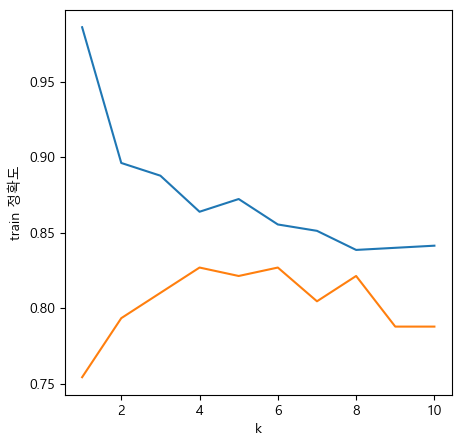

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc("font", family = "Malgun Gothic")

fig, ax = plt.subplots( figsize = (5,5) )

sns.lineplot( x="k", y="train 정확도", data=score_df )
sns.lineplot( x="k", y="test 정확도", data=score_df )

In [32]:
from sklearn.model_selection import GridSearchCV

# params = {
#     "n_neighbors" : k_param
# }

params = {
    "n_neighbors" : range(1, 11),
    "metric" : ["manhattan", "euclidean"],
    "weights" : ["uniform", "distance"]
}

knn = KNeighborsClassifier()

grid_cv = GridSearchCV(knn, param_grid=params, cv=5, n_jobs=-1)
grid_cv.fit( X_train_minMax, y_train )
print("최적의 하이퍼 파라미터 : ", grid_cv.best_params_ )

print( grid_cv.score( X_train_minMax, y_train ) )
print( grid_cv.score( X_test_minMax, y_test ) )

최적의 하이퍼 파라미터 :  {'metric': 'manhattan', 'n_neighbors': 4, 'weights': 'uniform'}
0.8665730337078652
0.8379888268156425


In [33]:
knn = KNeighborsClassifier(n_neighbors=3, metric="manhattan", weights="uniform")
knn.fit( X_train_minMax, y_train )

print( knn.score( X_train_minMax, y_train ) )
print( knn.score( X_test_minMax, y_test ) )

0.8834269662921348
0.8268156424581006


### 랜덤 포레스트 하이퍼 파라미터
* n_estimators
    - 트리의 개수. default=10
    - 트리의 개수가 많이면 성능은 좋아지지만, 시간이 오래 걸릴수 있다.
* max_depth
    - 트리의 최대 깊이. default = None
    - 완벽하게 파라미터값이 결정될 때 까지 분할 또는 min_samples_split보자 작아질 때까지 분할
    - 깊이가 깊어지면 과대적합될 수 있으므로 적절히 제어 필요
* min_samples_leaf
    - 맆노드(자식노드가 없는 노드)가 되기 위해 최소한의 샘플 데이터 수
    - min_samples_split과 함께 과대적합 제어용도
    - 불균형 데이터가 있는 경우 작게 설정하는게 좋다

<img src="../images/6.png" width="600" height="500" />

In [34]:
from sklearn.ensemble import RandomForestClassifier

df = pd.read_csv("../data_set/5.스케일링/titanic_cleaning.csv")
df.head()

PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare
0            1         0       3    0  22.0      1      0   7.2500
1            2         1       1    1  38.0      1      0  71.2833
2            3         1       3    1  26.0      0      0   7.9250
3            4         1       1    1  35.0      1      0  53.1000
4            5         0       3    0  35.0      0      0   8.0500

In [35]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare'],
      dtype='object')

In [36]:
f = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']
label = "Survived"
X, y = df[f], df[label]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print("train : ", rfc.score(X_train, y_train))
print("test : ", rfc.score(X_test, y_test))

train :  0.9873595505617978
test :  0.8324022346368715


In [43]:
rfc = RandomForestClassifier(n_estimators=10, max_depth=10000, min_samples_leaf=10)
rfc.fit(X_train, y_train)
print("train : ", rfc.score(X_train, y_train))
print("test : ", rfc.score(X_test, y_test))

train :  0.8581460674157303
test :  0.8212290502793296


In [45]:
params = {
    "n_estimators" : range(10, 101, 10),
    "max_depth" : range(4, 11, 2),
    "min_samples_leaf" : range(5, 21, 5)
}
rfc = RandomForestClassifier()

grid_cv = GridSearchCV( rfc, param_grid=params, cv=3, n_jobs=-1 )
grid_cv.fit( X_train, y_train )
print("최적의 하이퍼파라미터 : ", grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test : ", grid_cv.score(X_test, y_test))

최적의 하이퍼파라미터 :  {'max_depth': 8, 'min_samples_leaf': 5, 'n_estimators': 50}
train :  0.8764044943820225
test :  0.8156424581005587


In [46]:
grid_cv.predict( X_train )

array([1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

### 하이퍼파라미터
* n_estimators
    - 학습기의 수 설정.
    - 많으면 예측률은 올라가나 시간이 오래걸릴 수 있음.
* learning_rate
    - GBM이 학습을 진행할 때마다 적용하는 학습률로서 순차적으로 오류 값을 보정해가는 데 적용하는 수 이다
    - 0~1 사이의 값으로 지정한다. default=0.1
    - 너무 작은 값이면 업데이트를 너무 많이 하게 되어 꼼꼼하지만 시간이 오래 걸린다
    - 너무 큰 값이면 최소 오류 값을 찾지 못할 수 있지만 빠르다
* subsample
    - 학습기가 학습에 사용하는 데이터 샘플의 비율(0~1). default=1.
    - 0.5일경우 50%학습데이터를 사용한다는 것이다
    - 과대적합을 줄이려면 작은 값을 적용해야 한다.

In [47]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
print("train : ", gb.score(X_train, y_train))
print("test : ", gb.score(X_test, y_test))

train :  0.9044943820224719
test :  0.8212290502793296


In [54]:
gb = GradientBoostingClassifier( learning_rate=0.1, n_estimators=100, subsample=0.9 )
gb.fit(X_train, y_train)
print("train : ", gb.score(X_train, y_train))
print("test : ", gb.score(X_test, y_test))

train :  0.9058988764044944
test :  0.8324022346368715


In [59]:
import numpy as np

params = {
    "learning_rate" :[0.1, 0.3, 0.5, 0.7, 0.9],
    "n_estimators" : [100, 200, 300, 400, 500],
    "subsample" : np.arange(0.1, 1, 0.2)
}

gb = GradientBoostingClassifier()

grid_cv = GridSearchCV( gb, param_grid=params, cv=3, n_jobs=-1 )
grid_cv.fit(X_train, y_train)
print("파라미터 : ", grid_cv.best_params_)
print("train : ", grid_cv.score(X_train, y_train))
print("test : ", grid_cv.score(X_test, y_test))

파라미터 :  {'learning_rate': 0.1, 'n_estimators': 100, 'subsample': 0.5000000000000001}
train :  0.898876404494382
test :  0.8491620111731844
